# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Debate**


In [34]:
import json
import pandas as pd

In [217]:
# results_file = 'parallel_debate_runs/run_20251020_131736/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_135407/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_141121/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_074342/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_080557/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_091635/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_093704/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251021_094113/master_results.jsonl'
results_file = 'parallel_debate_runs/run_20251021_104033/master_results.jsonl'

results_df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
results_df.head()

run_id                  timestamp  question.question_idx  \
0  a3a944d0 1970-08-23 09:17:01.104126                    167   
1  f0f70991 1970-08-23 09:17:01.104127                     29   
2  8214bbbb 1970-08-23 09:17:01.104128                     21   
3  3932b8e3 1970-08-23 09:17:01.104129                     39   
4  8df9eff3 1970-08-23 09:17:01.104129                    135   

  question.choices_selected  \
0                    [3, 0]   
1                    [2, 0]   
2                    [0, 2]   
3                    [0, 3]   
4                    [0, 1]   

                              question.choice_values question.is_correct  \
0                              [2, 3 and 4, 3 and 4]       [False, True]   
1                                        [Blue, Red]       [False, True]   
2                 [weaker - slower, weaker – faster]       [True, False]   
3  [The compounds they are working with have simi...       [True, False]   
4                                           [4 π, 0]       [True, False]   

  question.dataset_name question.dataset_subset question.dataset_split  \
0       Idavidrein/gpqa            gpqa_diamond                  train   
1       Idavidrein/gpqa            gpqa_diamond                  train   
2       Idavidrein/gpqa            gpqa_diamond                  train   
3       Idavidrein/gpqa            gpqa_diamond                  train   
4       Idavidrein/gpqa            gpqa_diamond                  train   

  debater_direct.correct  debater_direct.confidence  debater_direct.cached  \
0                  False                      100.0                   True   
1                  False                      100.0                   True   
2                   True                      100.0                   True   
3                   True                      100.0                   True   
4                   True                      100.0                   True   

   judge_direct.correct  judge_direct.confidence  judge_direct.cached  \
0                 False                       85                 True   
1                  True                       90                 True   
2                 False                       85                 True   
3                  True                       85                 True   
4                 False                       95                 True   

   modes.non_interactive.turns modes.non_interactive.winner  \
0                          4.0                            B   
1                          3.0                            A   
2                          3.0                            B   
3                          4.0                            A   
4                          3.0                            A   

  modes.non_interactive.correct  modes.non_interactive.confidence  
0                          True                              75.0  
1                         False                              85.0  
2                         False                              85.0  
3                          True                              85.0  
4                          True                              85.0

In [218]:
correct_cols = results_df.filter(like='correct').drop(columns='question.is_correct')
accuracies = pd.DataFrame({
    'accuracy': correct_cols.mean(),
    'total_count': correct_cols.count()
})
accuracies

accuracy  total_count
debater_direct.correct         0.888889           90
judge_direct.correct                0.6          100
modes.non_interactive.correct  0.815217           92

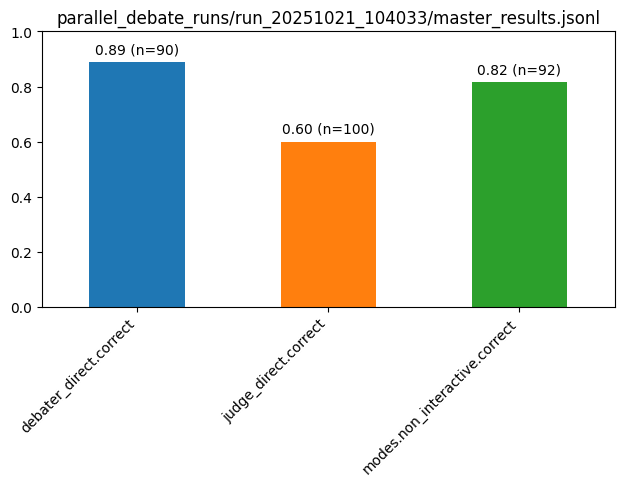

In [219]:
from matplotlib import pyplot as plt
ax = accuracies['accuracy'].plot.bar(color=plt.cm.tab10.colors, ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for bar, (idx, row) in zip(ax.patches, accuracies.iterrows()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{row["accuracy"]:.2f} (n={int(row["total_count"])})', 
            ha='center', va='bottom')
plt.tight_layout()
plt.title(results_file)
plt.show()

In [222]:
mode_prefix = 'modes.non_interactive'

results_df[f'{mode_prefix}.turns'].value_counts()


modes.non_interactive.turns
4.0    61
3.0    16
5.0     7
2.0     6
6.0     1
7.0     1
Name: count, dtype: int64

In [223]:
# Get the non interactive turns on correct vs incorrect debater answers
results_df[results_df[f'{mode_prefix}.correct'] == True][f'{mode_prefix}.turns'].describe()

count    75.000000
mean      3.853333
std       0.833315
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       7.000000
Name: modes.non_interactive.turns, dtype: float64

In [224]:

results_df[results_df[f'{mode_prefix}.correct'] == False][f'{mode_prefix}.turns'].describe()

count    17.000000
mean      3.705882
std       0.587868
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: modes.non_interactive.turns, dtype: float64

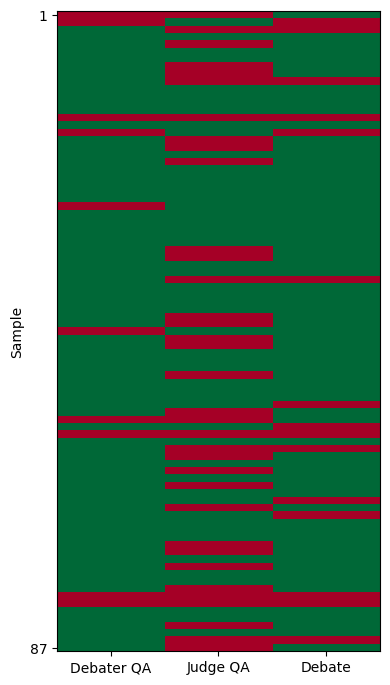

In [225]:
import matplotlib.pyplot as plt
import numpy as np

data = results_df[['debater_direct.correct', 'judge_direct.correct', f'{mode_prefix}.correct']].dropna().astype(float).values
fig, ax = plt.subplots(figsize=(4, max(6, len(data) * 0.08)))
im = ax.imshow(data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1, interpolation='nearest')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Debater QA', 'Judge QA', 'Debate'])
ax.set_ylabel('Sample')
ax.set_yticks([0, len(data)-1])
ax.set_yticklabels([1, len(data)])
plt.tight_layout()
plt.show()


In [226]:
results_df[f'{mode_prefix}.winner'].value_counts()

modes.non_interactive.winner
A    47
B    45
Name: count, dtype: int64

In [227]:
pd.crosstab(results_df[f'{mode_prefix}.winner'], results_df[f'{mode_prefix}.correct'], rownames=['Winner'], colnames=['Correct'])

Correct  False  True 
Winner               
A            8     39
B            9     36

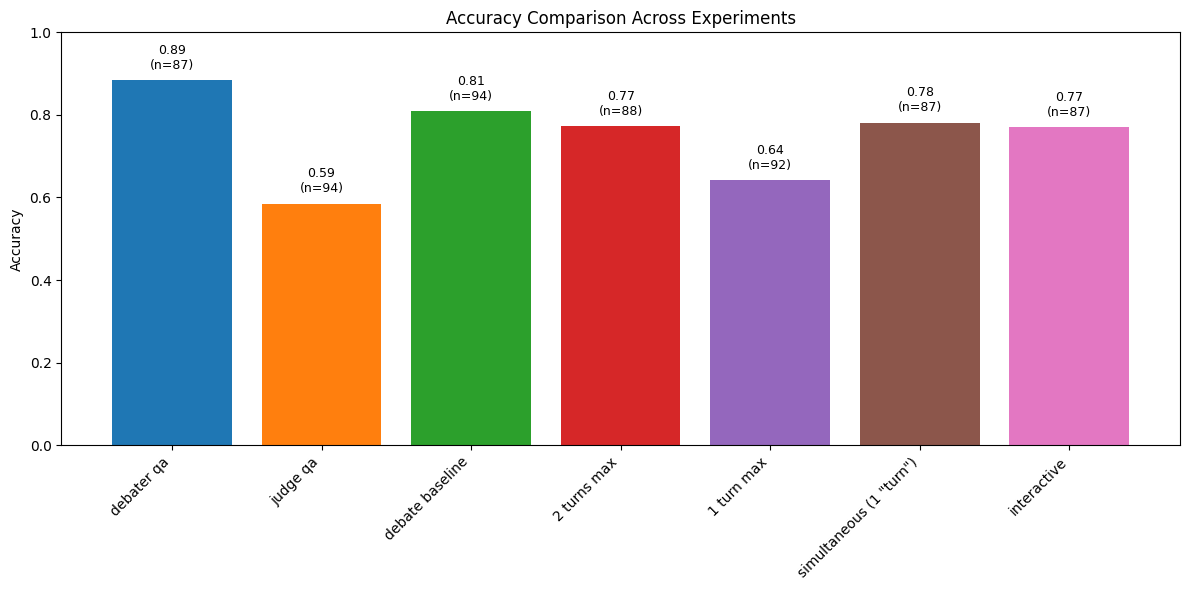

In [237]:
# Cross-experiment comparison
import matplotlib.pyplot as plt

runs = [
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debater_direct', 'judge_direct']),
    ('parallel_debate_runs/run_20251020_135407/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_074342/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_080557/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_091635/master_results.jsonl', ['debate']),
    ('parallel_debate_runs/run_20251021_093704/master_results.jsonl', ['debate']),
]

accuracies_list = []
labels_list = []

for results_file, conditions in runs:
    df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))
    
    for condition in conditions:
        if condition == 'debate':
            if 'modes.non_interactive.correct' in df.columns:
                col_name = 'modes.non_interactive.correct'
            else:
                col_name = 'modes.interactive.correct'
        else:
            col_name = f'{condition}.correct'
        
        if col_name in df.columns:
            accuracy = df[col_name].mean()
            count = df[col_name].count()
            accuracies_list.append((accuracy, count))
            
            run_id = results_file.split('_')[-2]
            labels_list.append(f"{run_id}_{condition}")

# Custom x-axis labels (one per bar)
custom_labels = ['debater qa', 'judge qa', 'debate baseline', '2 turns max', '1 turn max', 'simultaneous (1 "turn")', 'interactive']
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = range(len(accuracies_list))
accuracies = [a[0] for a in accuracies_list]
counts = [a[1] for a in accuracies_list]
bars = ax.bar(x_pos, accuracies, color=plt.cm.tab10.colors[:len(accuracies_list)])
ax.set_xticks(x_pos)
ax.set_xticklabels(custom_labels, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.set_title('Accuracy Comparison Across Experiments')

for bar, acc, count in zip(bars, accuracies, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{acc:.2f}\n(n={int(count)})',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
